<a href="https://colab.research.google.com/github/emgifford/Post-Graduate-Certificate-in-Data-Science-and-Business-Analytics/blob/main/Project_3_Supervised_Learning_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

**GOAL:** build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

**Key feature feature of this exploration: normalized_used_price.** 

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Supervised Learning/Project 3/used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head() #checking that dataset went through from loading 

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
data.shape #checking the rows/columns of data 

(3454, 15)

In [ ]:
data.info() #checking for amount of objects, floats/integers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

There are 4 categorical types and the rest are floats/integers. 

In [ ]:
data.describe().T #To get statistical summary of data 

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [ ]:
data.describe(include='object') #statistical summary of categorical/non-numerical values

,brand_name,os,4g,5g
count,3454,3454,3454,3454
unique,34,4,2,2
top,Others,Android,yes,no
freq,502,3214,2335,3302


In [ ]:
data.duplicated().sum() #there are no duplicated values as indicated by the 0 sum 

0

In [ ]:
data.isnull().sum() #there are missing vaules, must be treated 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**Univariate Analysis Functions**

In [ ]:
#Functions being defined for EDA 
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


**Numerical Univariate Analysis**

**Histogram and Boxplot of Normalized Used Price**

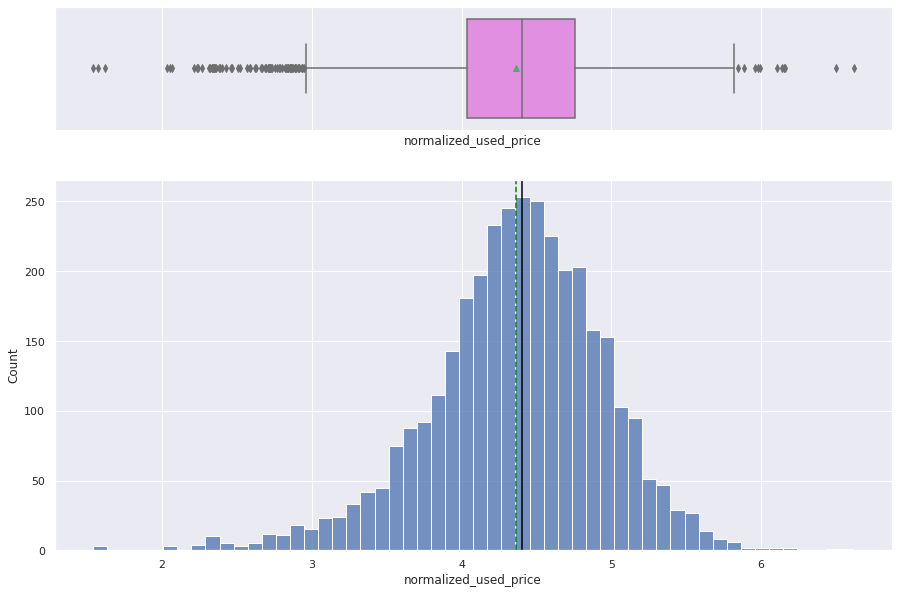

In [ ]:
histogram_boxplot(df, "normalized_used_price")

(from a glance, appears normally distributed) 

**Histogram and Boxplot of Normalized New Price**

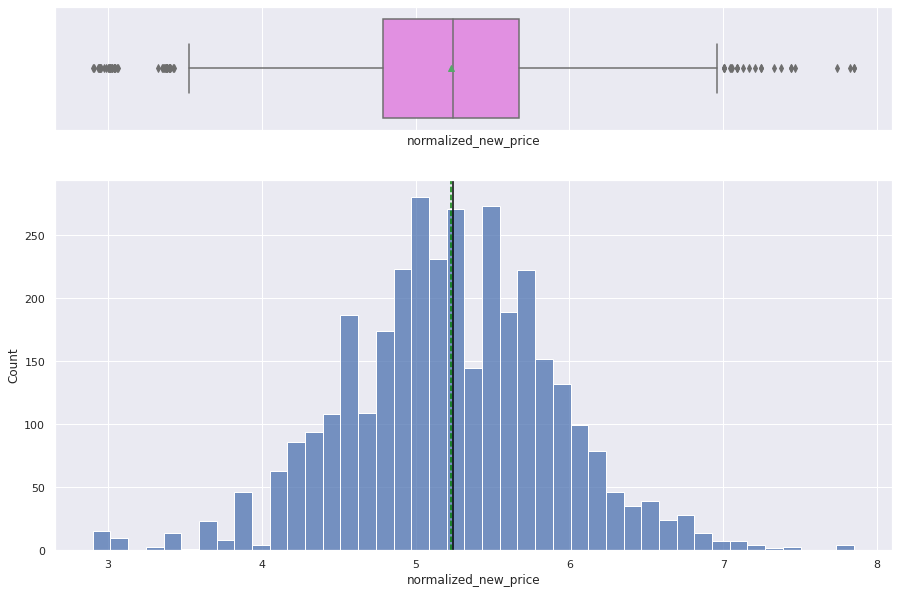

In [ ]:
histogram_boxplot(df, "normalized_new_price") 

(from a glance, appears normally distributed) 

**Histogram and Boxplot for Screen Size** 

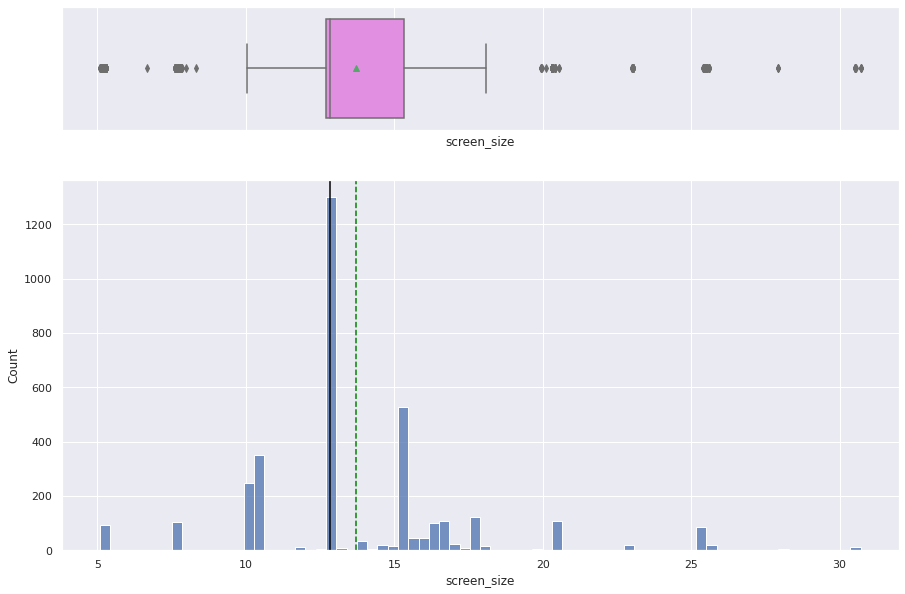

In [ ]:
histogram_boxplot(df, "screen_size") 

(at first glance, doesn't appear to be normally distributed) 

**Histogram and Boxplot of Main Camera MP** 

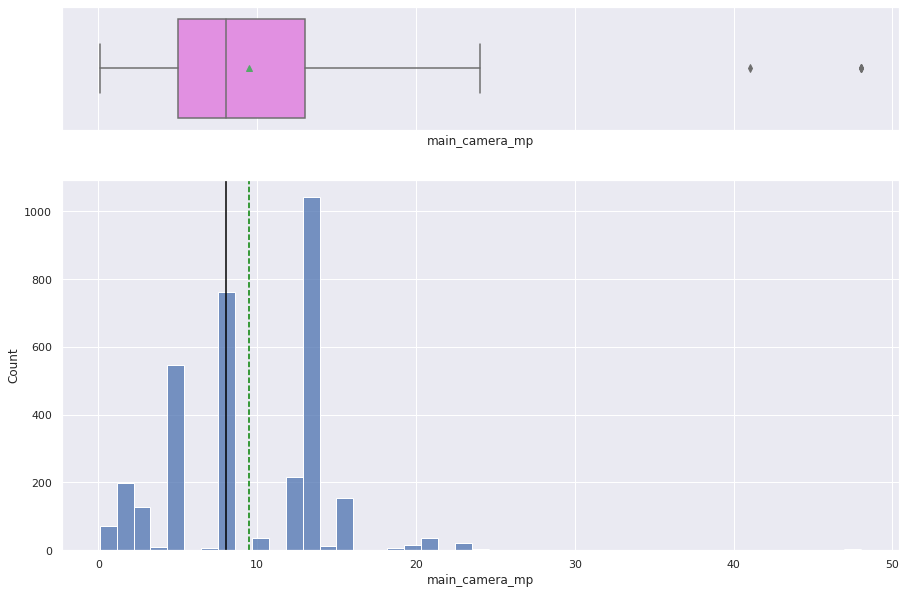

In [ ]:
histogram_boxplot(df, "main_camera_mp") 

(doesn't appear to be normally distributed) 

**Histogram and Boxplot of Selfie Camera MP** 

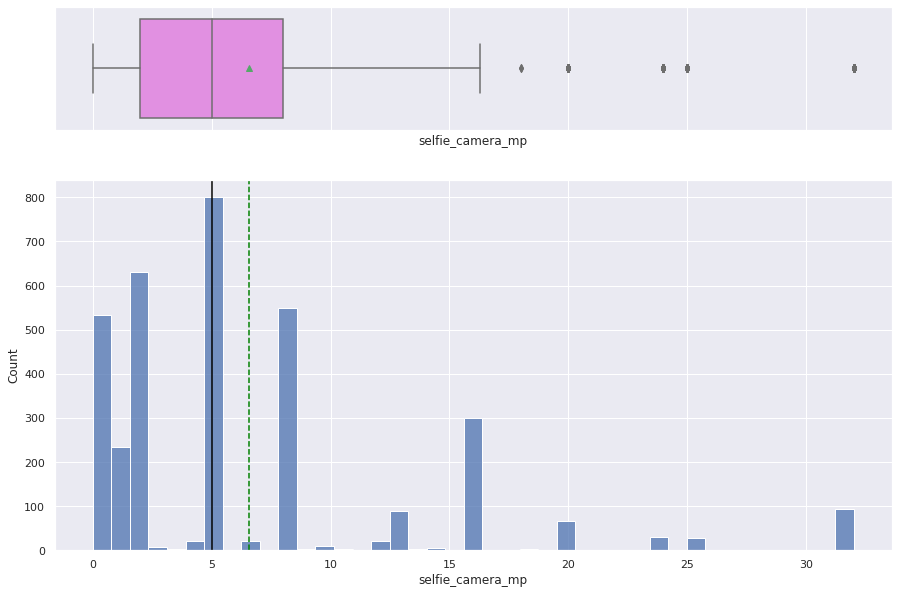

In [ ]:
histogram_boxplot(df, "selfie_camera_mp") 

(doesn't appear to be normally distributed)

**Histogram and Boxplot of Int Memory**

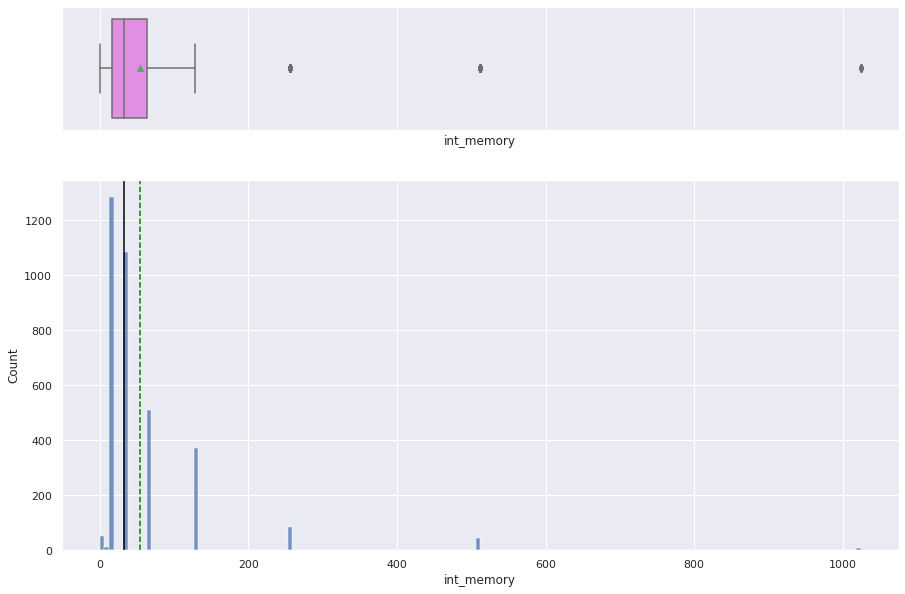

In [ ]:
histogram_boxplot(df, "int_memory") 

(data seems heavily right skewed with outliers) 

**Histogram and Boxplot for Ram**

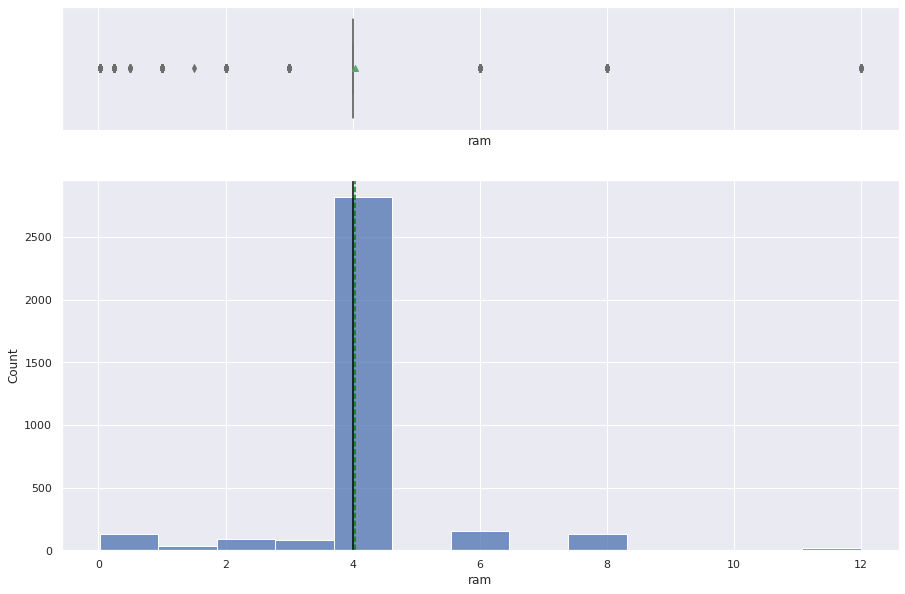

In [ ]:
histogram_boxplot(df, "ram") 

(data appears mainly at 4, but there's a lot of outliers) 

**Histogram and Boxplot of Weight**

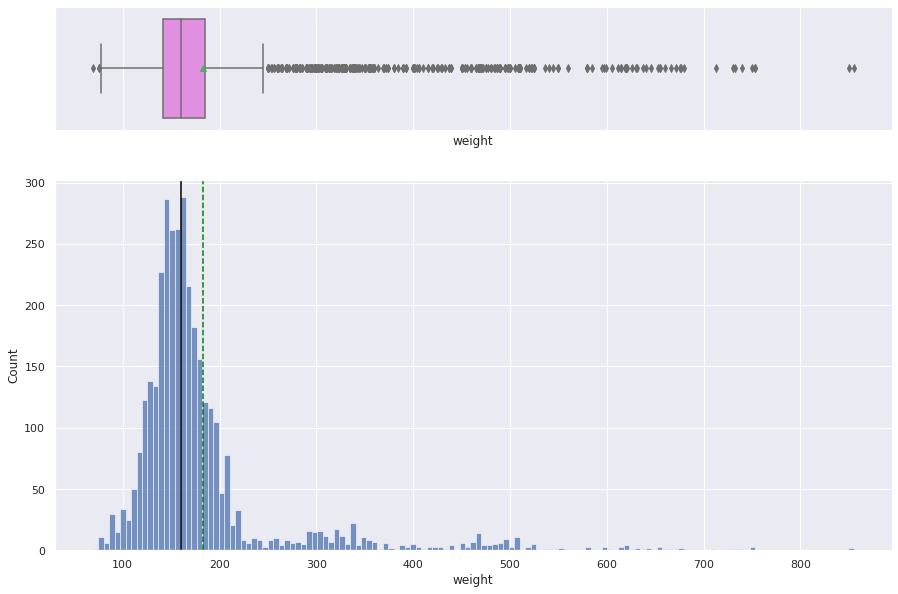

In [ ]:
histogram_boxplot(df, "weight") 

(data appears right skewed, lots of outliers) 

**Histogram and Boxplot of Battery**

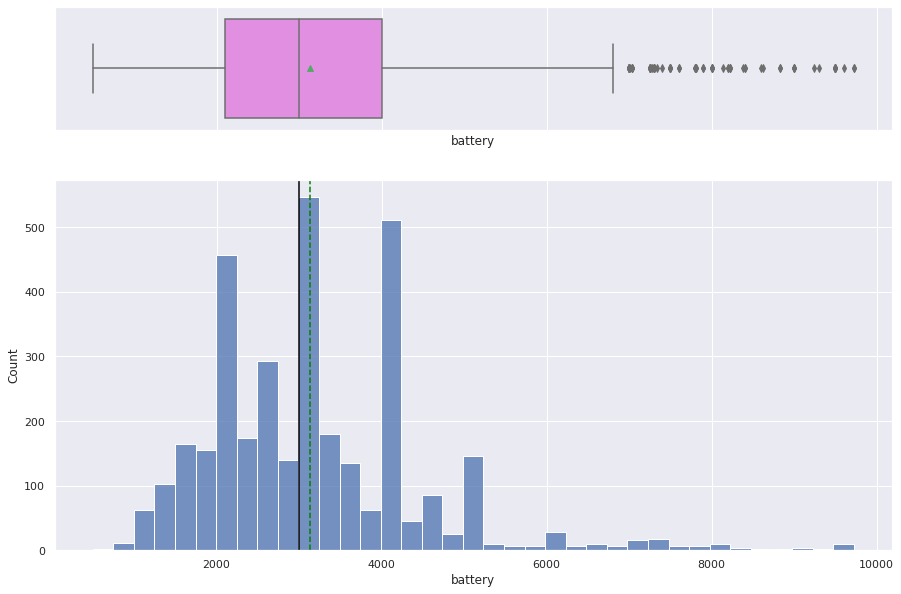

In [ ]:
histogram_boxplot(df, "battery") 

(data has outliers, also appears right skewed) 

**Histogram and Boxplot of Days Used**

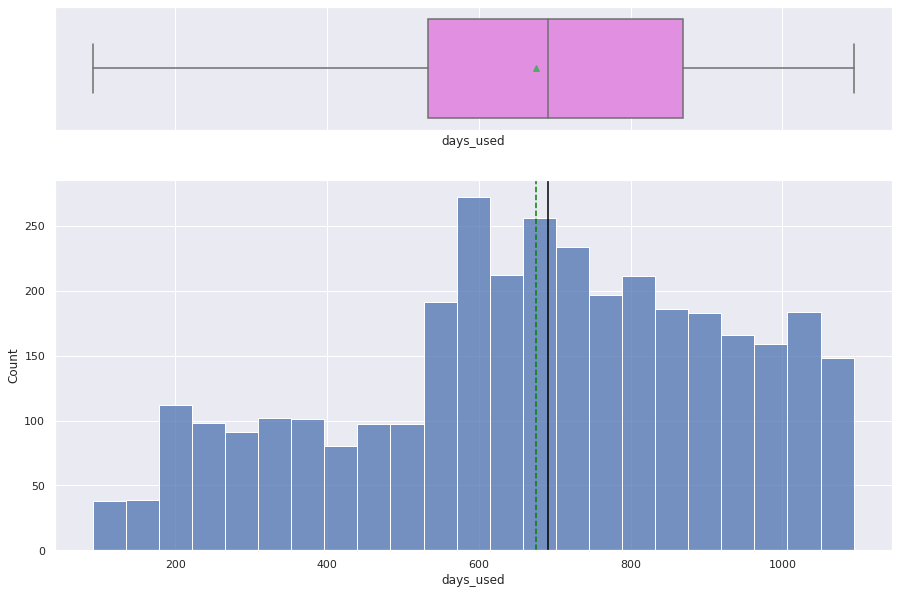

In [ ]:
histogram_boxplot(df, "days_used") 

#

**Labeled Barplot of Brand Name**

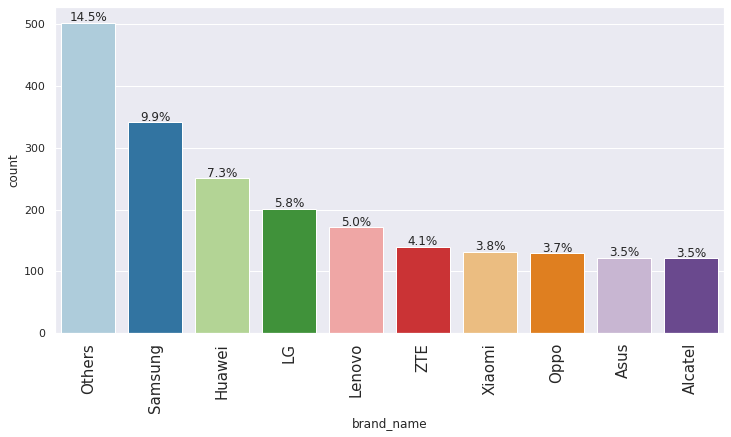

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**Labeled Barplot of OS**

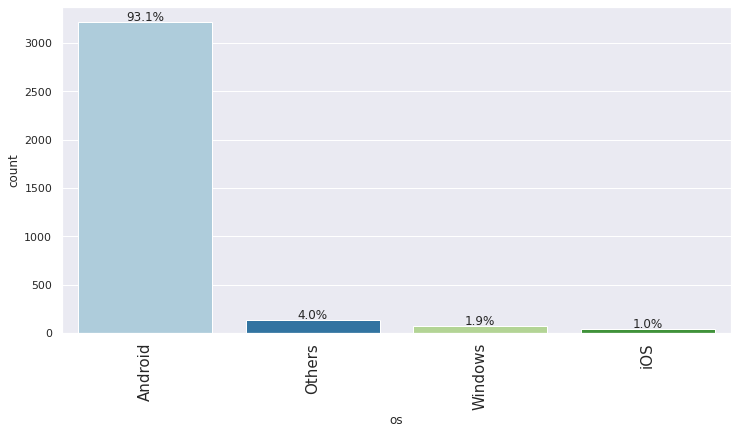

In [ ]:
labeled_barplot(df, "os", perc=True, n=10)

93.1% of the used market in this dataset is Android 

**Labeled Barplot of 4G**

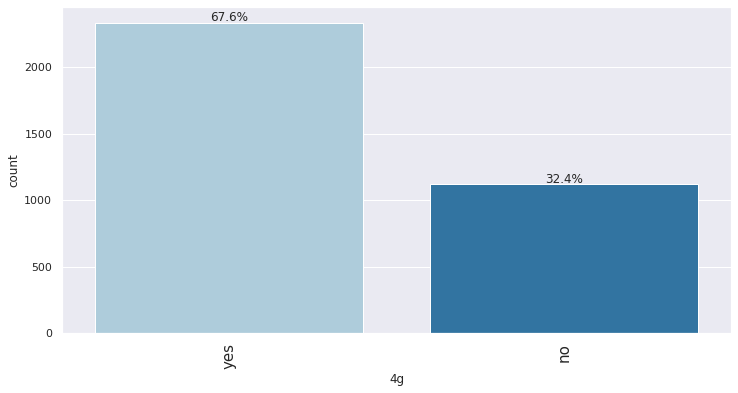

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10)

**Labeled Barplot of 5G**

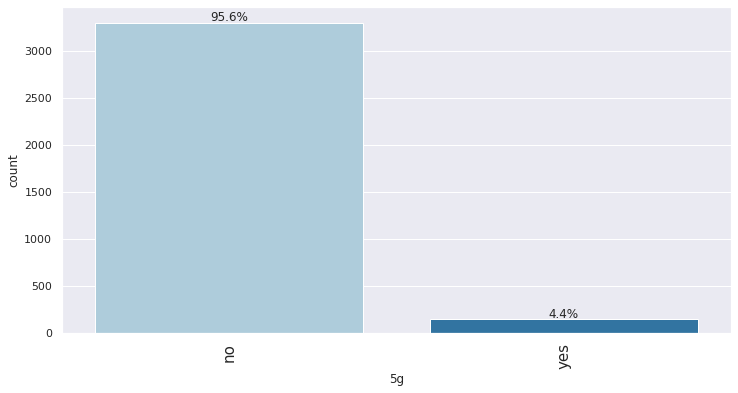

In [ ]:
labeled_barplot(df, "5g", perc=True, n=10)

**Labeled Barplot of Release Year**

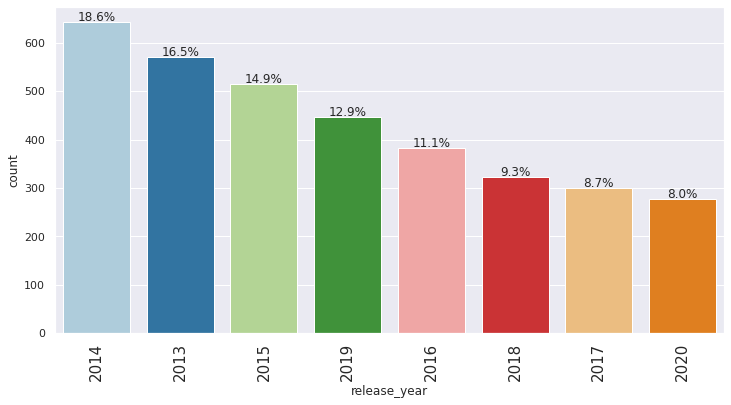

In [ ]:
labeled_barplot(df, "release_year", perc=True, n=10)

**Bivariate Analysis**

**Heatmap of Numerical Values to Check Correlation**

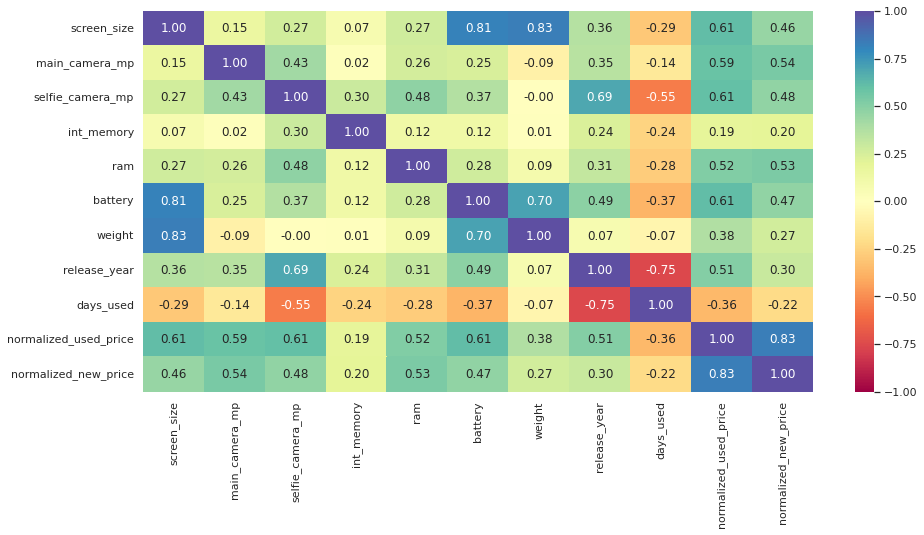

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

*Please note that release year is a sequence type data.*

*   It looks as if battery and screen size are notably positively correlated
*   It looks as if battery and weight are notably positively correlated 
*   It looks as if screen size and weight are notably positively correlated 
*   It looks as if normalized used price and normalized new price are notably positively correlated

There are other positive correlations as well, but I've indicated the standouts. 





**Ram and Brand**

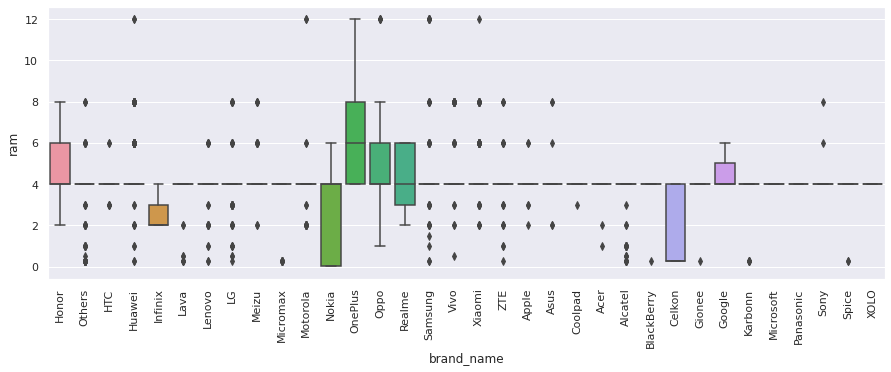

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

RAM appears to vary greatly with lots of outliers

Honor, Infinix, Nokia, OnePlus, Oppo, Realme, Celkon, and Google have readable boxplots. 

**Large Battery and Weight (greater than 4500 mAh)** 

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

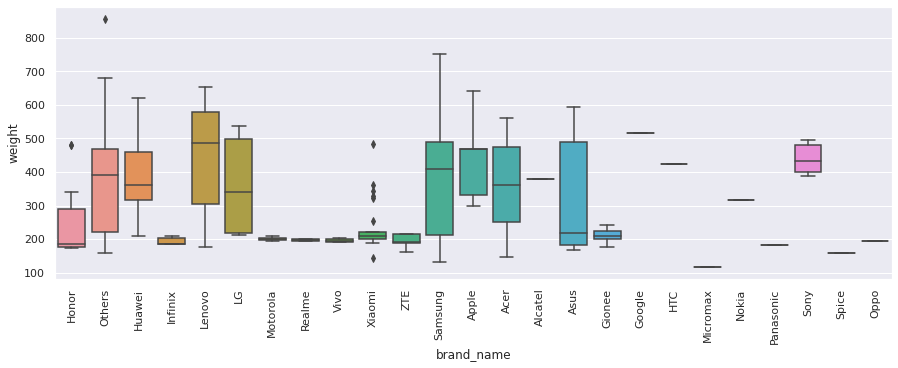

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

Weight of devices with large batteries tends to vary among brands with some outliers. 

**Phones and tablets available across different brands with a screen size larger than 6 inches**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54] #there's exactly 2.54 cm in 1 inch--hence the conversion 
df_large_screen.shape

(1099, 15)

There are 1099 phones and tablets across different brands with a screen size larger than 6 inches. 

**Brand names with large screens (6 inches>) and their counts**

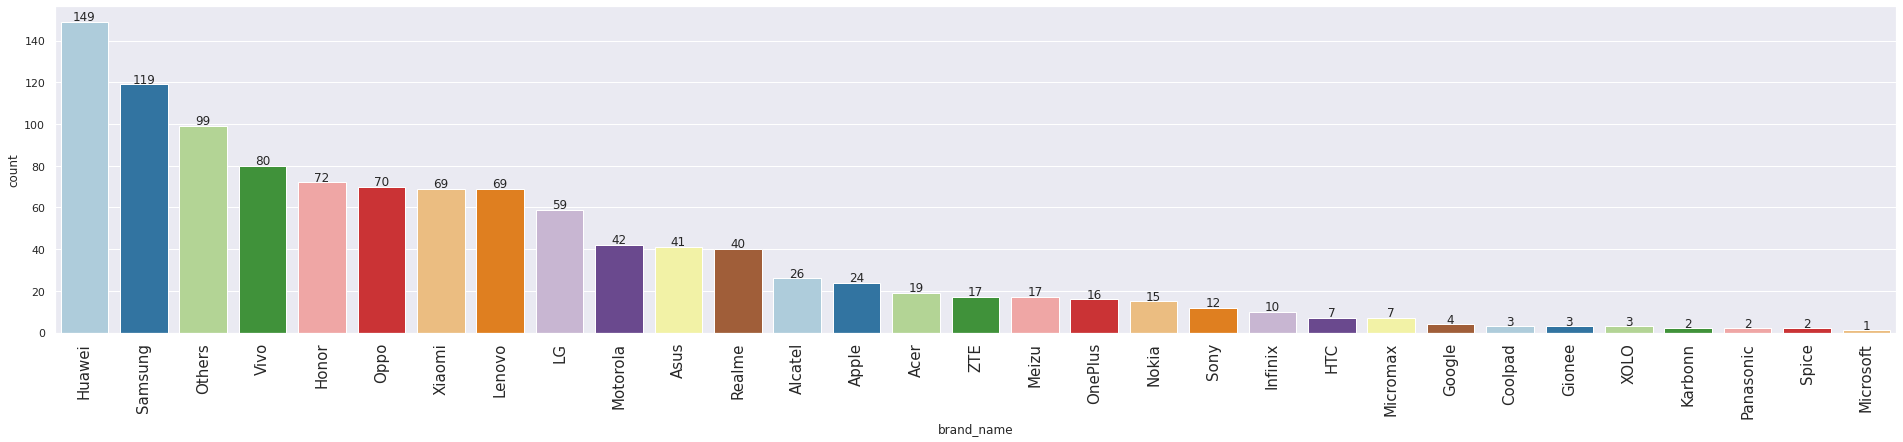

In [ ]:
labeled_barplot(df_large_screen, "brand_name") #checking which brands have large screens and how many they offer 

31 brands offer devices with large screens (larger than 6 inches) 

Huawei has the largest amount of devices with screens larger than 6 inches at 149. Microsoft has the least at 1. 

**Distribution of devices offering greater than 8MP selfie cameras across brands**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

There are 655 devices with selfie cameras with more than 8MP 

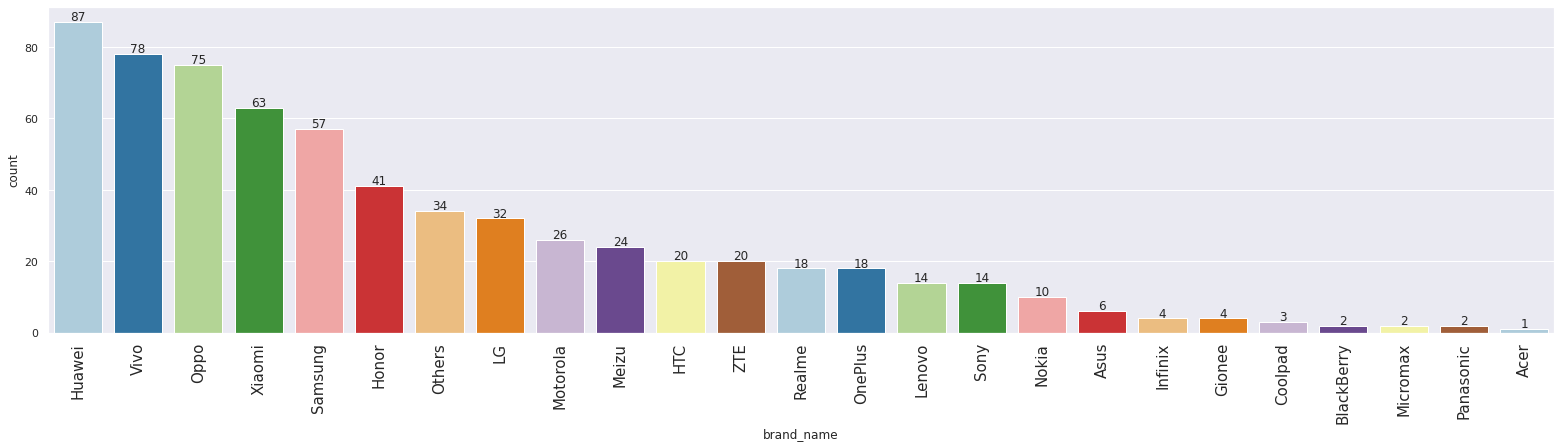

In [ ]:
labeled_barplot(df_selfie_camera, "brand_name")

Most of these 655 devices are with Huawei (87), Vivo (78), and Oppo(75). Acer has the least at (1). 

**Which attributes are highly correlated with the normalized price of a used device? Let's begin exploration:** 

**Release year and normalized used price lineplot**

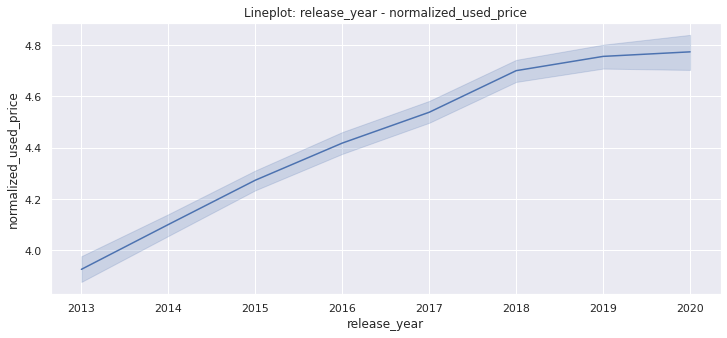

In [ ]:
#release year and normalized used price 
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "release_year", y="normalized_used_price")
plt.title("Lineplot: release_year - normalized_used_price")
plt.show()



Appears to have a high correlation between release year and price, as the release year goes up, so does the used price. 

**Lineplot of days used and normalized used price** 

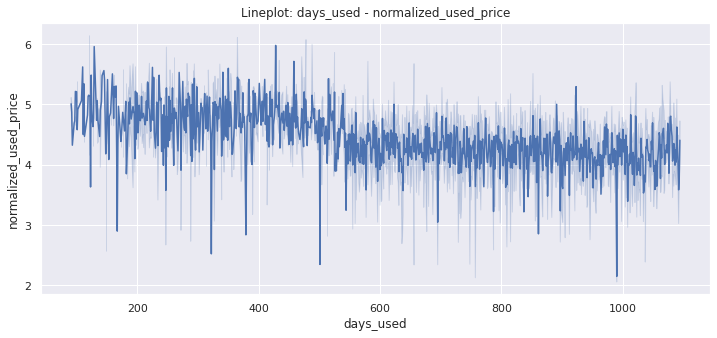

In [ ]:
#days used and normalized used price 
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "days_used", y="normalized_used_price")
plt.title("Lineplot: days_used - normalized_used_price")
plt.show()

Visually, slight suggestion that the fewer days used, the higher the used price. i.e. slight negative correlation as days used increases, normalized use price falls.  

**Screen size and normalized used price**

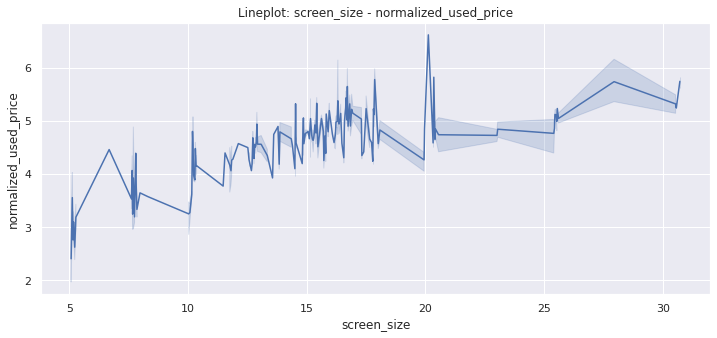

In [ ]:
#screen size and normalized used price 
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "screen_size", y="normalized_used_price")
plt.title("Lineplot: screen_size - normalized_used_price")
plt.show()

Shows in general a positive correlation visually speaking: when screen size goes up so does normalized used price (again not causation) 

**Showing side by side boxplots of normalized used price of 4G and 5G.**

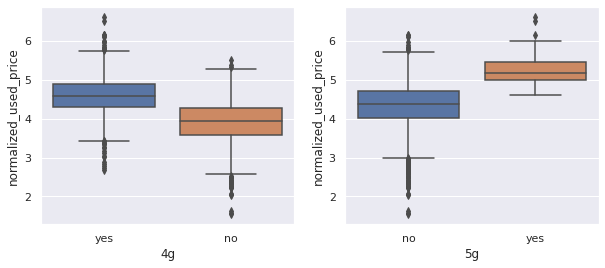

In [ ]:
#side by side of boxplots of normalized used price of 4G and 5G 
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

Outliers are present, but it appears 5g has higher normalized used prices than 4G which makes sense.

**Main camera mp and normalized used price** 

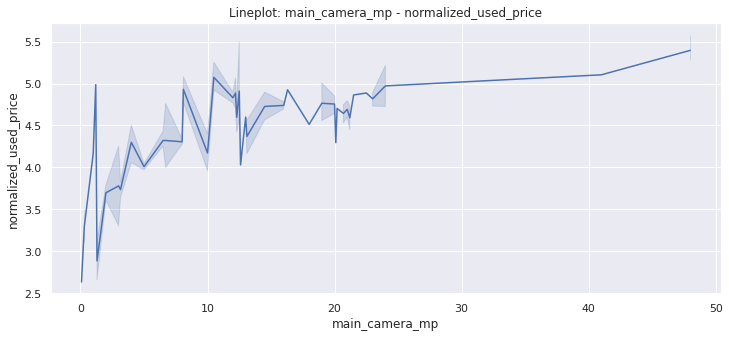

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "main_camera_mp", y="normalized_used_price")
plt.title("Lineplot: main_camera_mp - normalized_used_price")
plt.show()

Appears that in general normalized used price and main camera are positively correlated. 

**Selfie camera and normalized used price**

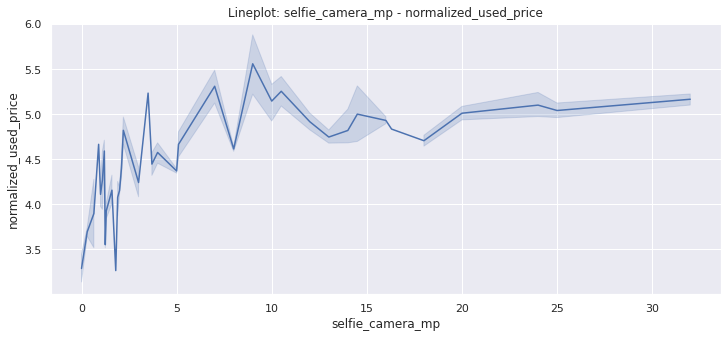

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "selfie_camera_mp", y="normalized_used_price")
plt.title("Lineplot: selfie_camera_mp - normalized_used_price")
plt.show()

Hard to tell, but more or less positively correlated.

**Weight and normalized used price**

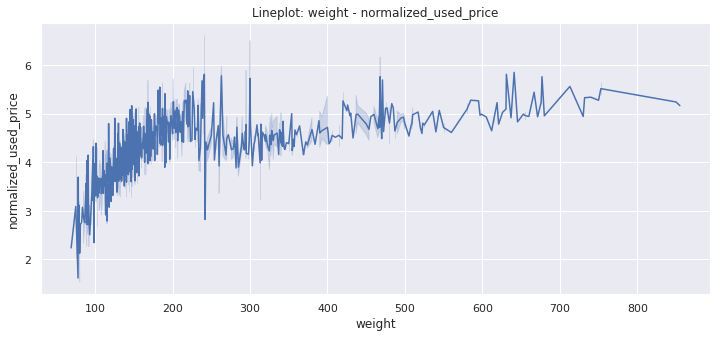

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "weight", y="normalized_used_price")
plt.title("Lineplot: weight - normalized_used_price")
plt.show()

Appears to be positively correlated 

**Battery and normalized used price**

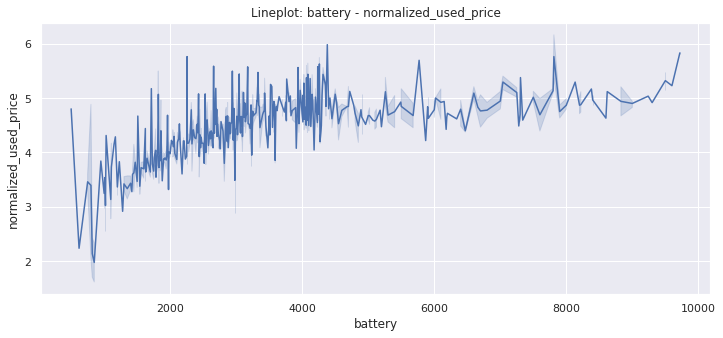

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "battery", y="normalized_used_price")
plt.title("Lineplot: battery - normalized_used_price")
plt.show()

Appears to be positivley correlated.

**Ram and normalized used price**

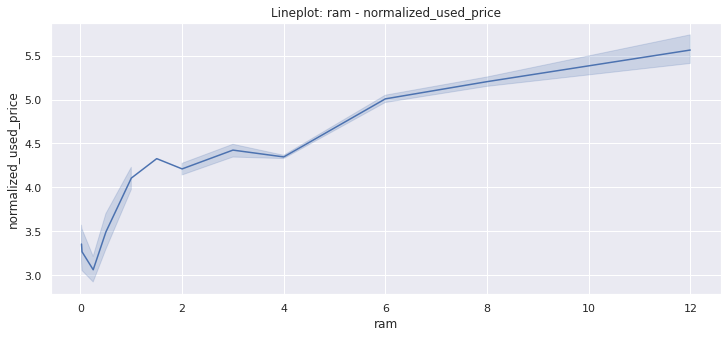

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "ram", y="normalized_used_price")
plt.title("Lineplot: ram - normalized_used_price")
plt.show()

Appears to be a positively correlated trend in general. 

**int_memory and normalized used price**

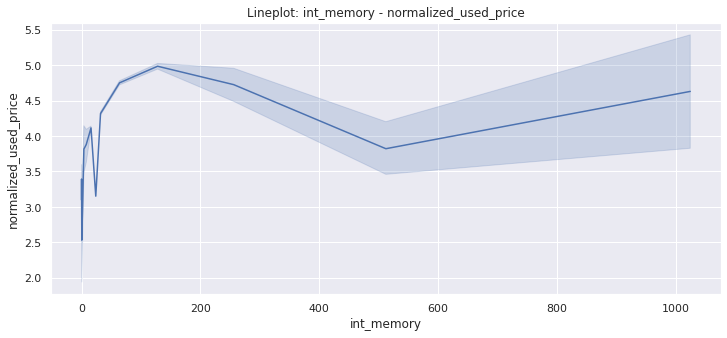

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x= "int_memory", y="normalized_used_price")
plt.title("Lineplot: int_memory - normalized_used_price")
plt.show()

Hard to tell the relationship

**Answering some of the questions posed.**

1. What does the distribution of normalized used device prices look like?
*From a univariate perspective, pretty normally distributed.* 

2. What percentage of the used device market is dominated by Android devices?
*93.1% of the used device market in this dataset are dominated by Android*

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
*RAM appears to vary greatly with lots of outliers*

*Honor, Infinix, Nokia, OnePlus, Oppo, Realme, Celkon, and Google have readable boxplots.*

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

*Weight of devices with large batteries tends to vary among brands with some outliers.* 

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

*There are 1099 phones and tablets across different brands with a screen size larger than 6 inches.* 

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

*There are 655 devices with selfie cameras with more than 8MP*

7. Which attributes are highly correlated with the normalized price of a used device?

*There are appears to be a negative correlation with both year released and days used. As these times increase, the normalized used price decreases.*

*There appears to be a positive correlation with screen size and the normalized used price. As screen size increases, so does price.*

*It appears 5G has higher normalized used prices than 4G (which makes sense).* 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df1 = df.copy() #creating a new set as to not mess up the older copy 
df1.isnull().sum() #there are missing values and must be treated 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**The missing values are below and should be imputed**
*   main_camera_mp           179
*   selfie_camera_mp           2
*   int_memory                 4
*   ram                        4
*   battery                    6
*   weight                     7




**Imputing missing values with medians**

In [ ]:
#imputing missing values with median (general rule of thumb use median, mean can cause data to be skewed more)
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())
df1['selfie_camera_mp'] = df1['selfie_camera_mp'].fillna(df1['selfie_camera_mp'].median())
df1['int_memory'] = df1['int_memory'].fillna(df1['int_memory'].median())
df1['ram'] = df1['ram'].fillna(df1['ram'].median())
df1['battery'] = df1['battery'].fillna(df1['battery'].median())
df1['weight'] = df1['weight'].fillna(df1['weight'].median())

In [ ]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**Imputation successful **

##EDA after imputation

**Exploring the data once again after manipulating it.**

In [ ]:
#Functions being defined for EDA II
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


**Numerical Univariate Analysis II (after imputation of median)**

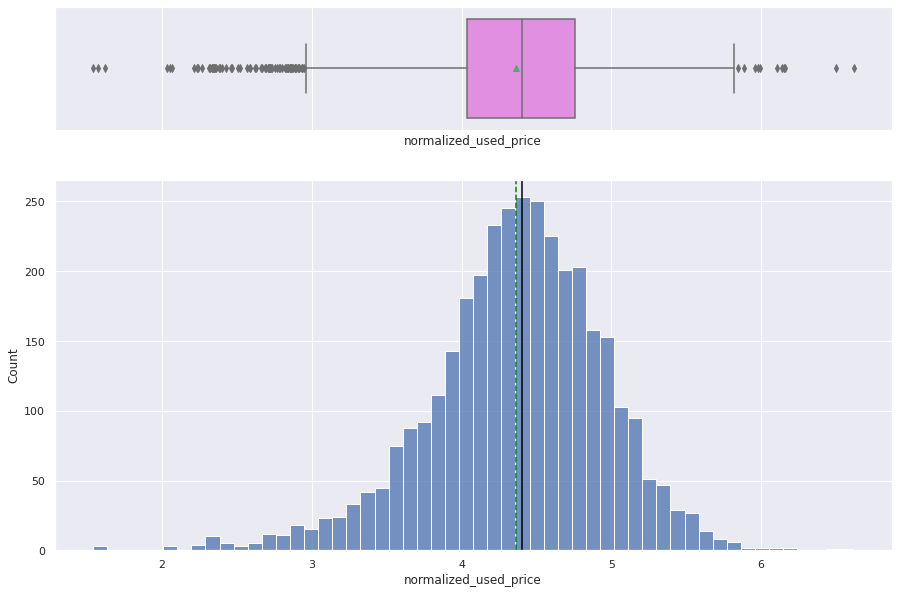

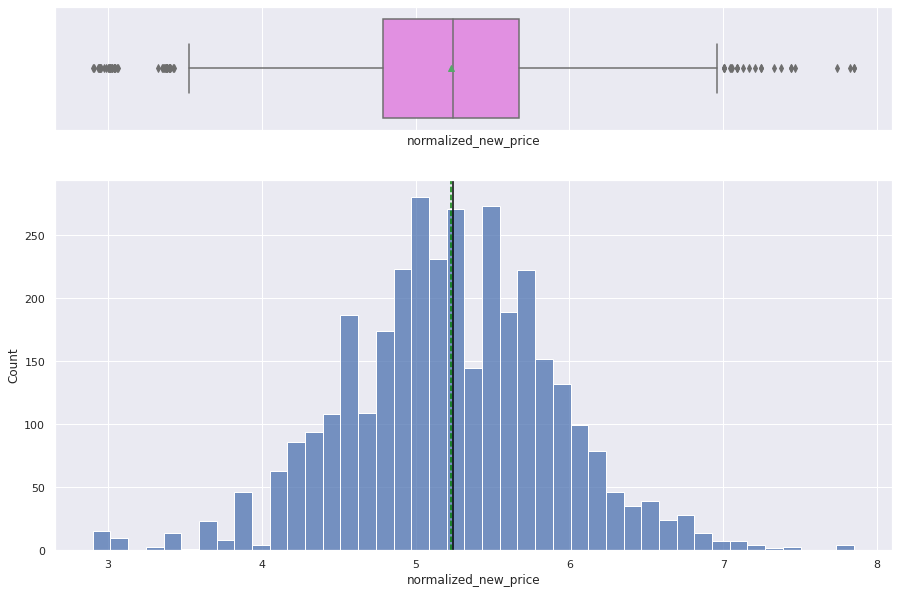

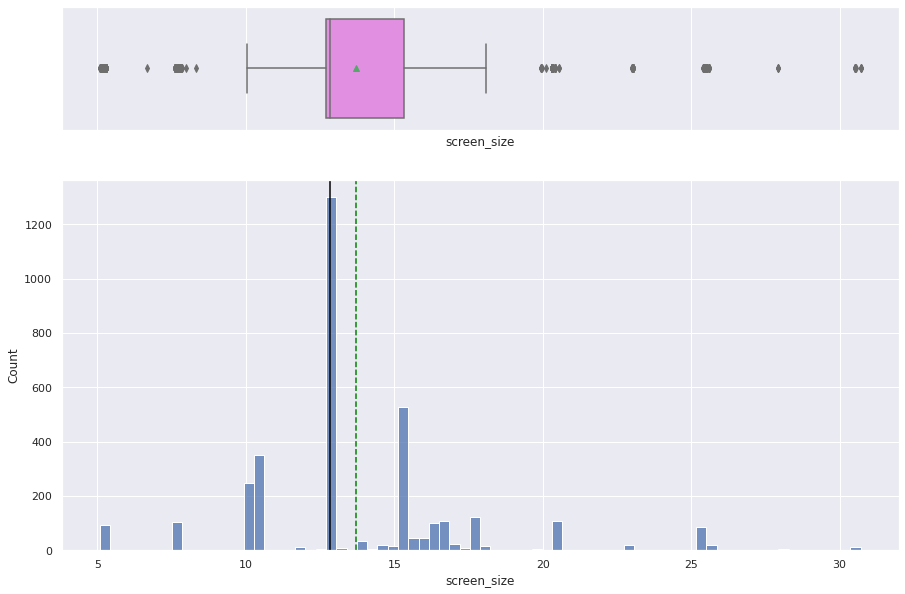

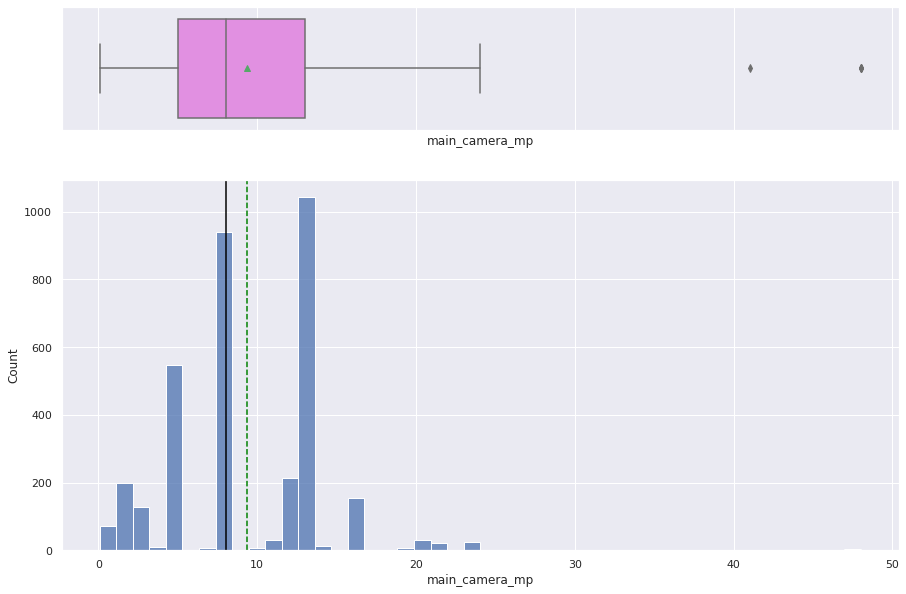

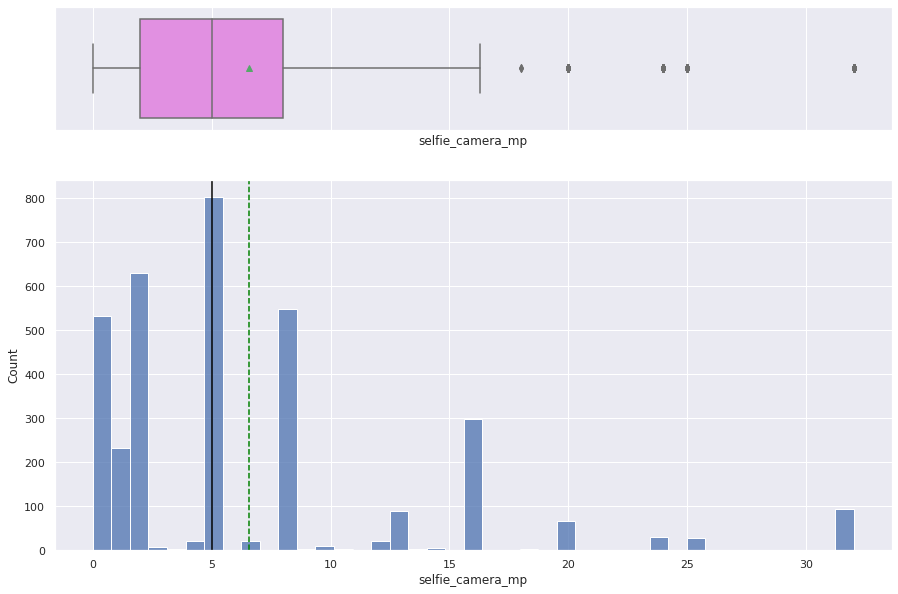

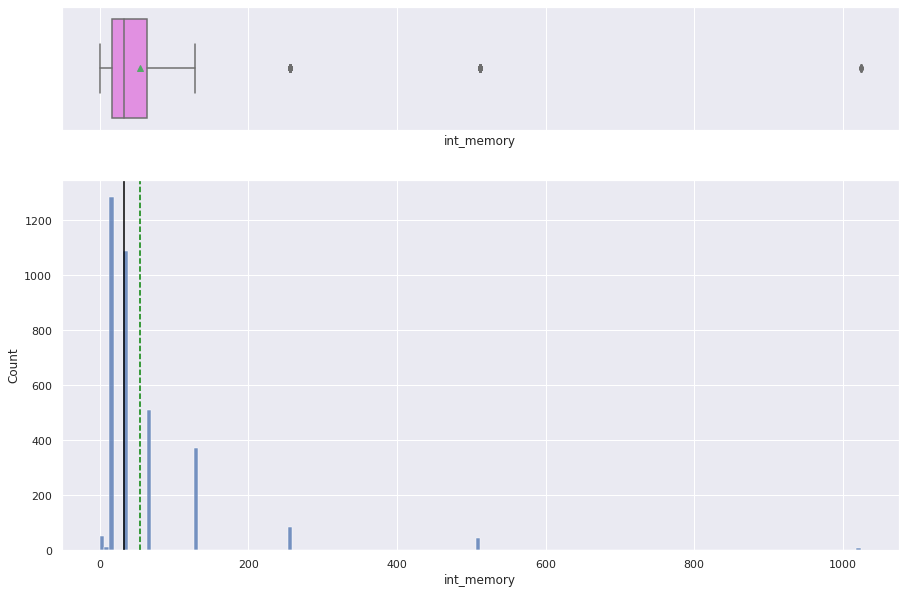

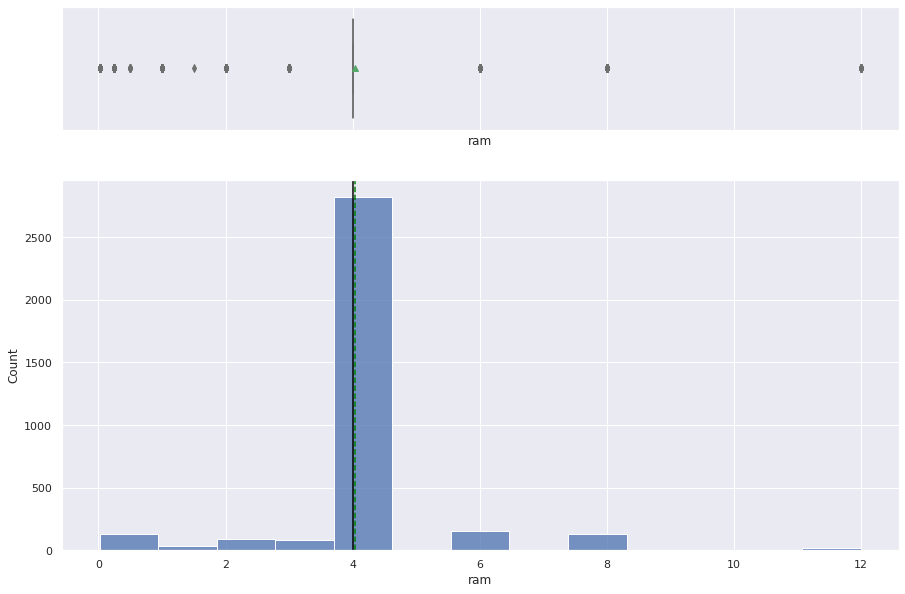

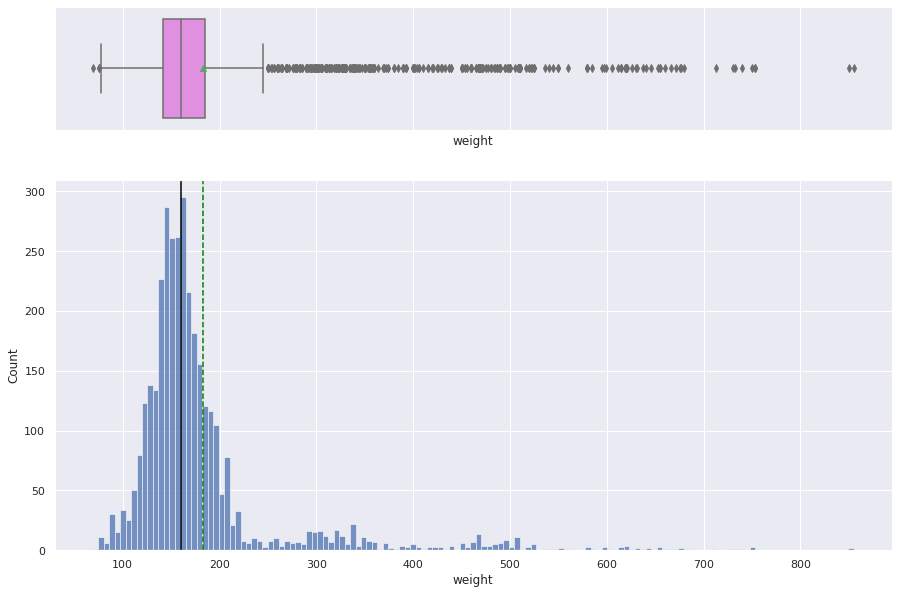

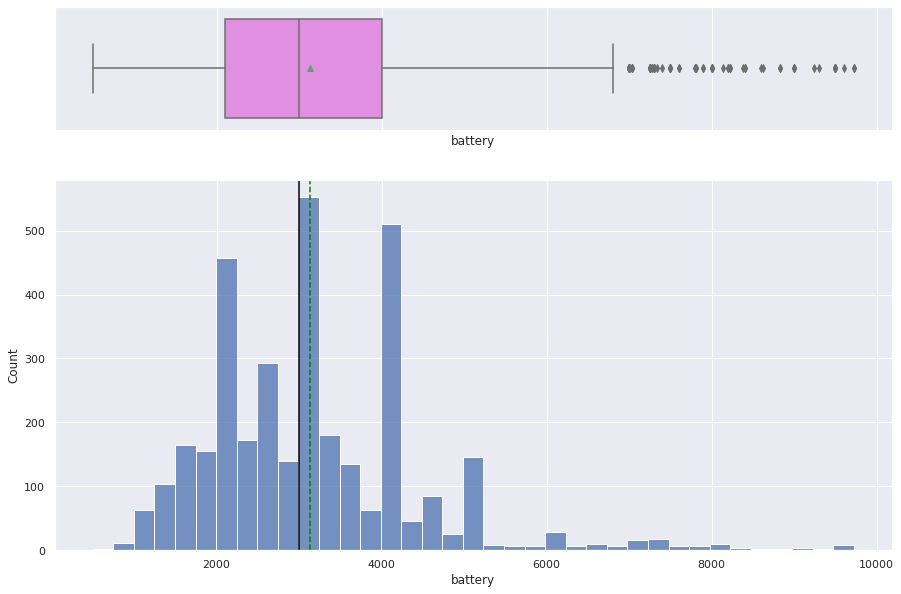

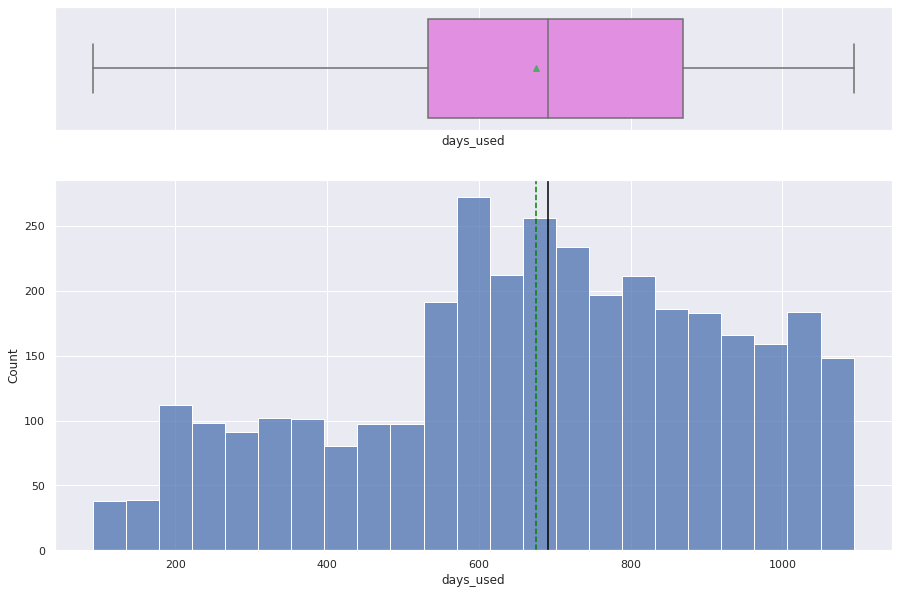

In [ ]:
#exploring the data again after imputation
histogram_boxplot(df1, "normalized_used_price")
histogram_boxplot(df1, "normalized_new_price") 
histogram_boxplot(df1, "screen_size") 
histogram_boxplot(df1, "main_camera_mp")
histogram_boxplot(df1, "selfie_camera_mp")
histogram_boxplot(df1, "int_memory") 
histogram_boxplot(df1, "ram") 
histogram_boxplot(df1, "weight") 
histogram_boxplot(df1, "battery") 
histogram_boxplot(df1, "days_used") 




Data still has a lot of outliers. 

**Categorical/Object Univariate Analysis II after imputation**

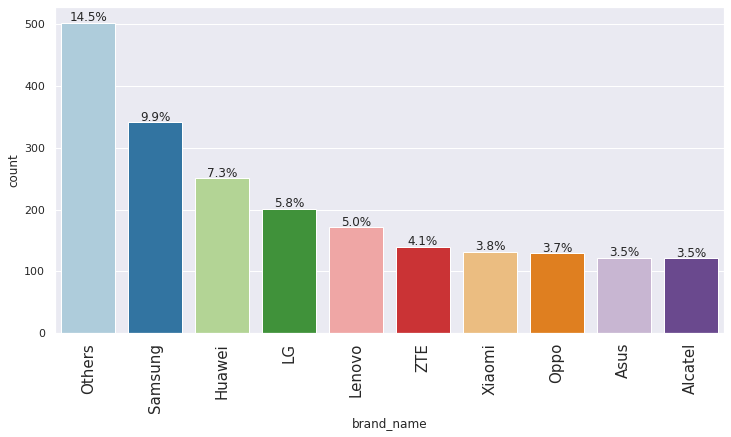

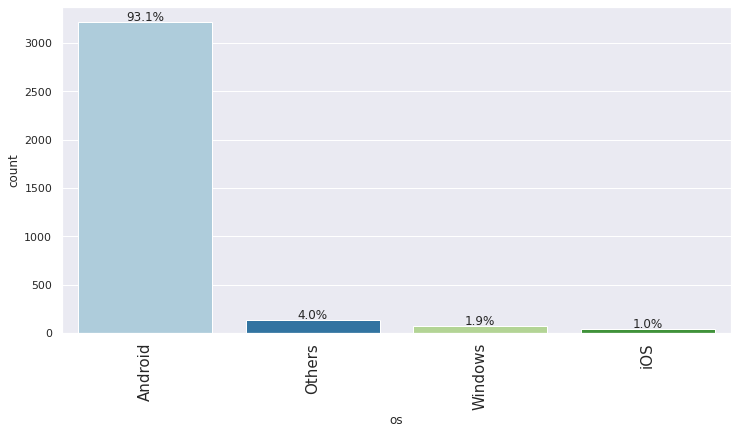

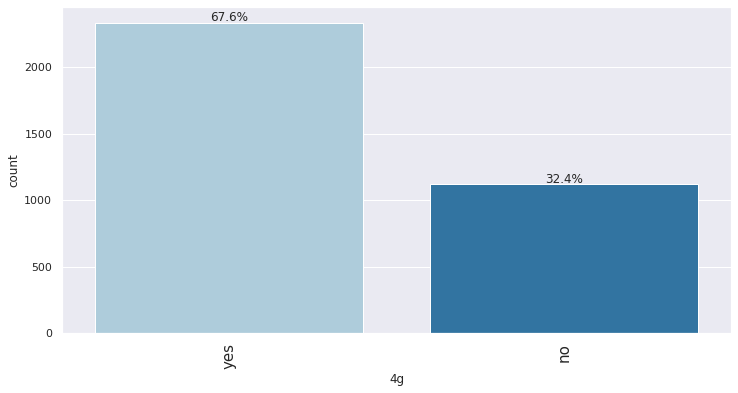

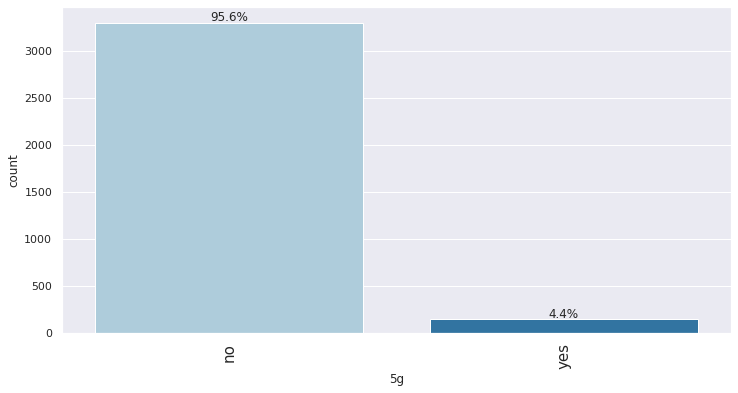

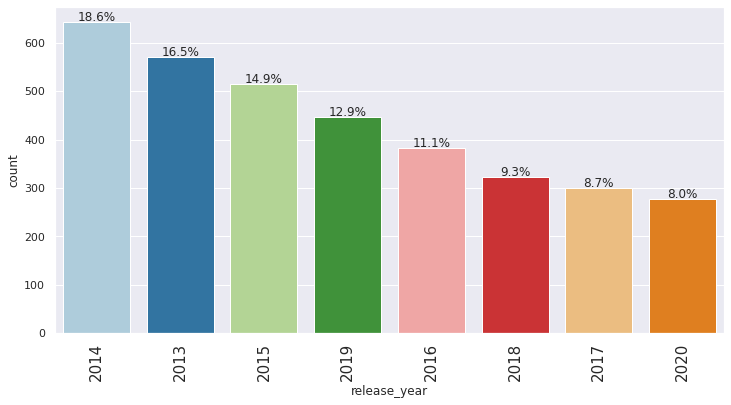

In [ ]:
#Categorical/Object Univariate Analysis II after imputation
labeled_barplot(df1, "brand_name", perc=True, n=10)
labeled_barplot(df1, "os", perc=True, n=10)
labeled_barplot(df1, "4g", perc=True, n=10)
labeled_barplot(df1, "5g", perc=True, n=10)
labeled_barplot(df1, "release_year", perc=True, n=10)

Data is pretty similar to pre-imputation. 

**Bivariate Analysis II (after imputation)**

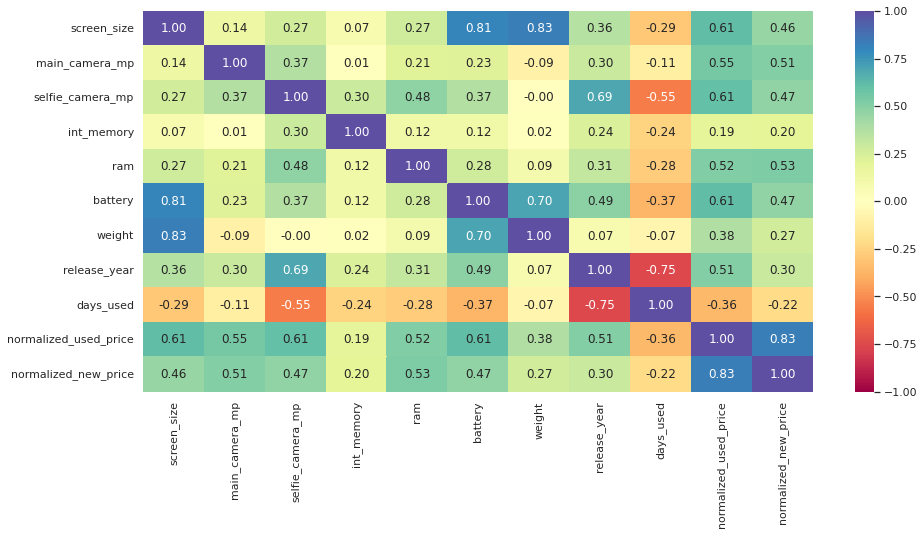

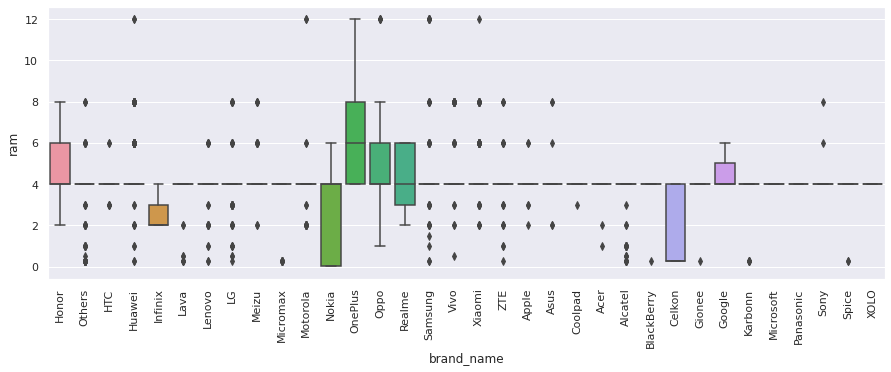

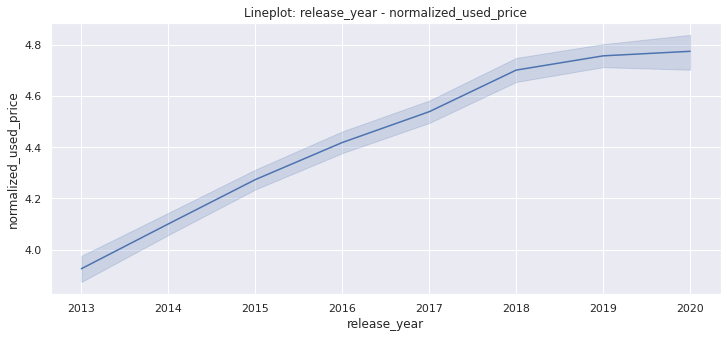

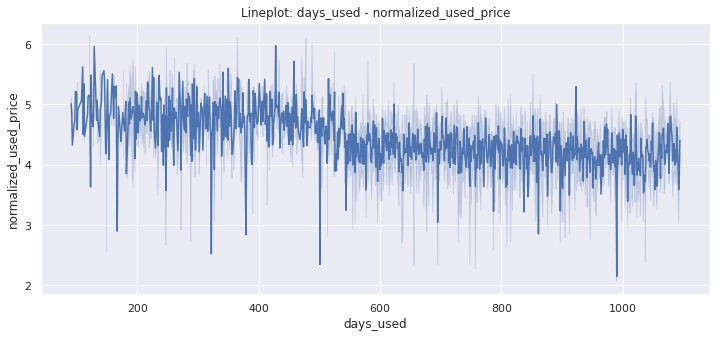

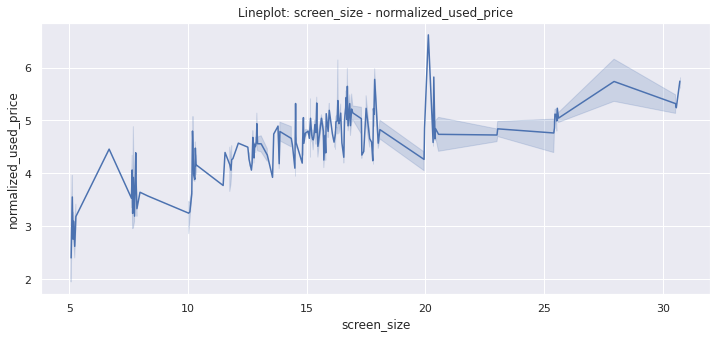

In [ ]:
#Bivariate Analysis II (after imputation)
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(data=df1, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "release_year", y="normalized_used_price")
plt.title("Lineplot: release_year - normalized_used_price")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "days_used", y="normalized_used_price")
plt.title("Lineplot: days_used - normalized_used_price")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "screen_size", y="normalized_used_price")
plt.title("Lineplot: screen_size - normalized_used_price")
plt.show()

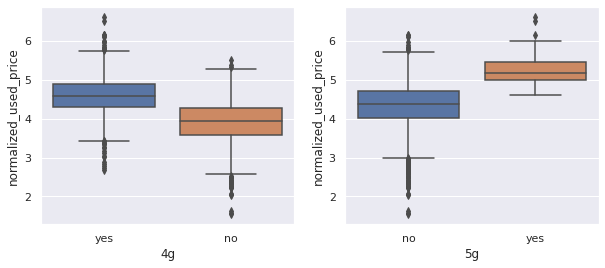

In [ ]:
#breaking up code block just in case for bivariate analysis II after imputation
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df1, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df1, x="5g", y="normalized_used_price")

plt.show()

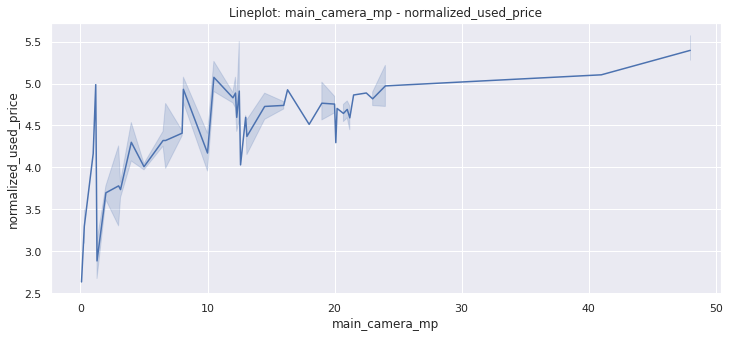

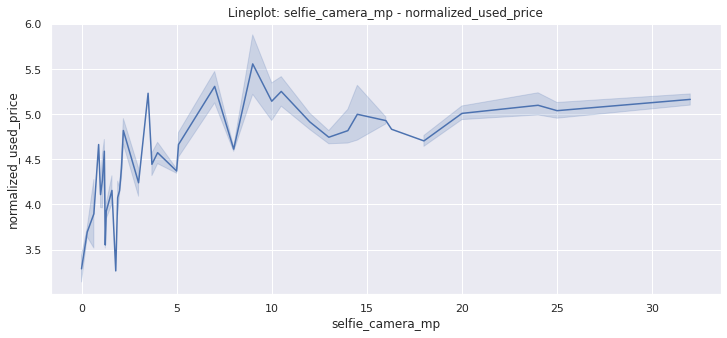

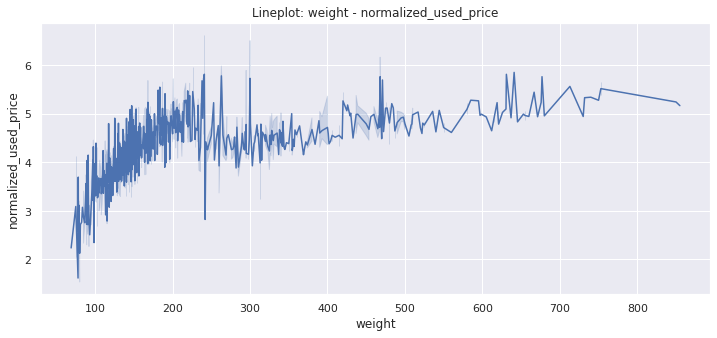

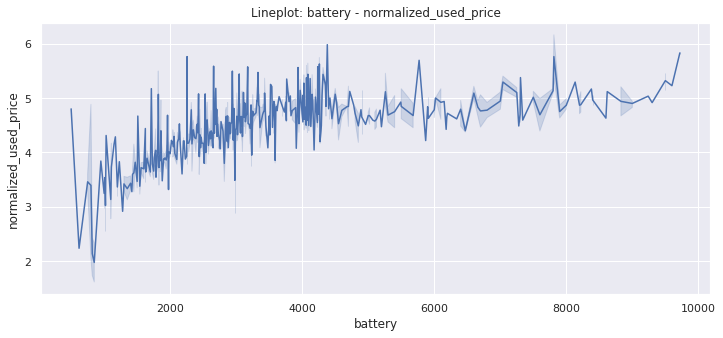

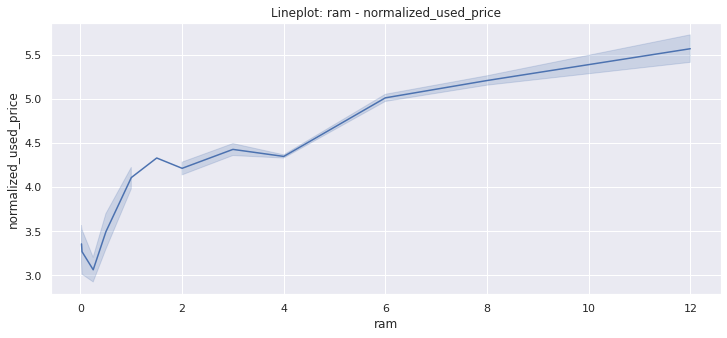

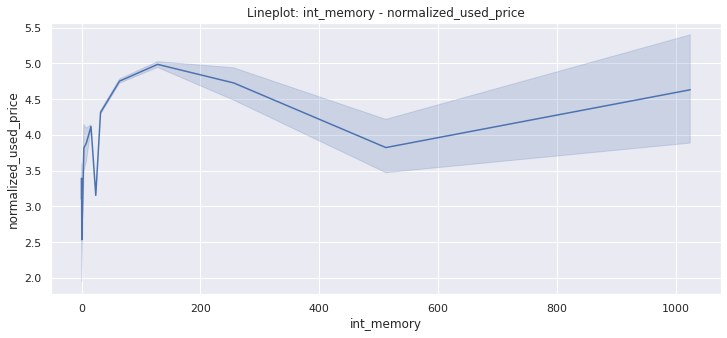

In [ ]:
#bivariate analysis II after imputation continued 
plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "main_camera_mp", y="normalized_used_price")
plt.title("Lineplot: main_camera_mp - normalized_used_price")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "selfie_camera_mp", y="normalized_used_price")
plt.title("Lineplot: selfie_camera_mp - normalized_used_price")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "weight", y="normalized_used_price")
plt.title("Lineplot: weight - normalized_used_price")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "battery", y="normalized_used_price")
plt.title("Lineplot: battery - normalized_used_price")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "ram", y="normalized_used_price")
plt.title("Lineplot: ram - normalized_used_price")
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df1, x= "int_memory", y="normalized_used_price")
plt.title("Lineplot: int_memory - normalized_used_price")
plt.show()


Imputation didn't drastically change visuals of data. 

## Model Building - Linear Regression

**Feature Engineering**

In [ ]:
#starting off with feature engineering to better suit the model training 
#2021 is base 
#dropping release year 
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)

#showing the new columns info 
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

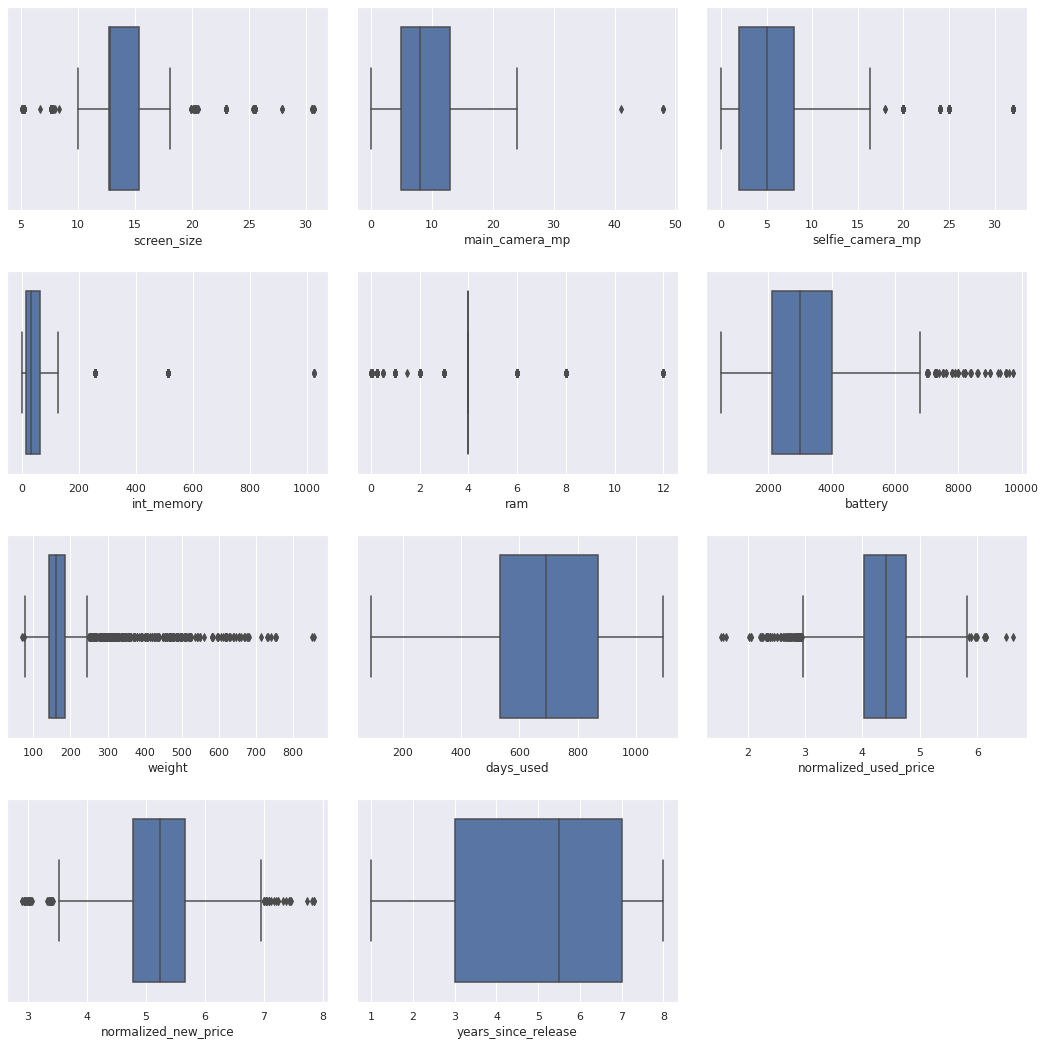

In [ ]:
#detecting outliers via boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

There are outliers. 

**Data Preparation for Modeling**

In [ ]:
#establishing dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
#adding intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#making dummy variables 
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#splitting the data in 70:30 ratio for train to test data (rule of thumb is the 70:30)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
#Getting numerical values of train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


**Model Building and Linear Regression**

In [ ]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                           01:16:00   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -150.4
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


\

**Interpreting the Regression Results:**

Adjusted R-squared is on the higher side (0 to 1 is the range).
*   Adjusted R-squared is 0.842 (the model is good).

Const coefficient is the Y-intercept. 
*   Ideally, should be 0, but it isn't often that 0 is an option
*   This model is at 1.3286











## Model Performance Check

In [ ]:
# function to calculate adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to calculate MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to calculate different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to calculate R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to calculate adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to calculate RMSE
    mae = mean_absolute_error(target, pred)  # to calculate MAE
    mape = mape_score(target, pred)  #to calculate MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229849,0.180336,0.844933,0.841723,4.326958


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238306,0.184064,0.842547,0.834731,4.488006


**Observations**

The training R2 is 0.84, so the model is not underfitting.

The train and test RMSE and MAE are comparable, so the model is not overfitting either.

MAE suggests that the model can predict normalized used price within a mean error of 0.18 on the test data

MAPE of 4.49 on the test data means that we are able to predict within 4.49% of the normalized used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

***Assumptions in need of checking:***

**No Multicollinearity**

**Linearity of variables**

**Independence of error terms**

**Normality of error terms**

**No Heteroscedasticity**

**Using Variance Inflation Factor (VIF) to test for multicollinearity**

In [ ]:
#Using Variance Inflation Factor (VIF) to test for multicollinearity
#function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,228.603553
1,screen_size,7.680705
2,main_camera_mp,2.136597
3,selfie_camera_mp,2.808416
4,int_memory,1.361465
5,ram,2.258272
6,battery,4.073582
7,weight,6.380746
8,days_used,2.669393
9,normalized_new_price,3.121941


There are multiple **columns** with **very high VIF values**, indicating presence of strong multicollinearity. 

*Next is to systematically drop numerical columns with VIF > 5*

Also notable: we will ignore the VIF values for dummy variables and the constant (intercept).

High values: 

screen_size: 7.68

weight: 6.38 **bold text**

(the brand names appear categorical) 

In [ ]:
#creating function to deal with multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"] #identifying high VIF columns

res = treating_multicollinearity(x_train, y_train, col_list)#checking model performance after dropping these columns from train data 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838448,0.234655
1,weight,0.838179,0.234849


In [ ]:
#seeing average of test/train adjusted Rsquared to compare to screen_size and weight adjusted Rsquared 

#train adjusted Rsquared plus test performance adjusted Rsquared 
(0.841723+0.834731)/2
#answer is 0.838227

#screen_size at 0.838448 is making least difference 

0.838227

screen_size is making the least difference in test/train data, will drop. 

In [ ]:
col_to_drop = "screen_size"#column to drop 
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]#dropping from train
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]#dropping from test

# Checking VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,203.584858
1,main_camera_mp,2.133663
2,selfie_camera_mp,2.804937
3,int_memory,1.359361
4,ram,2.258270
5,battery,3.835470
6,weight,2.980013
7,days_used,2.657368
8,normalized_new_price,3.079715
9,years_since_release,4.717189


**All good now! **

**Dropping high p-value variables (if applicable)**

Some of the dummy variables in the data have p-value > 0.05. 

In essense, they are not significant and will thus be dropped.

From time to time, p-values change after dropping a variable. As such, variables will not be dropped all at once. 

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_LG', 'brand_name_Micromax', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()#on updated dataset 
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     837.2
Date:                   Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                           01:16:02   Log-Likelihood:                 82.585
No. Observations:                   2417   AIC:                            -133.2
Df Residuals:                       2401   BIC:                            -40.53
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233843,0.182808,0.839498,0.838428,4.392176


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241224,0.185969,0.838669,0.836138,4.541137


**Test for Linearity and Independence**


In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.886296,0.201192
1525,4.448399,4.612963,-0.164564
1128,4.315353,4.302529,0.012824
3003,4.282068,4.265073,0.016995
2907,4.456438,4.464609,-0.008171


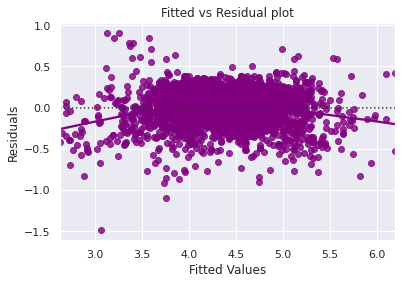

In [ ]:
# plotting the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Appears to be a cloud with no pattern--the assumptions of linearity and independence are satisfied.

**Test for Normality**


*Residuals should be normally distributed. *

Will look at histogram of residuals and will be checking via a Q-Q plot of residuals and Shapiro-Wilk test.

Null hypothesis: Residuals are normally distributed

Alternate hypothesis: Residuals are not normally distributed

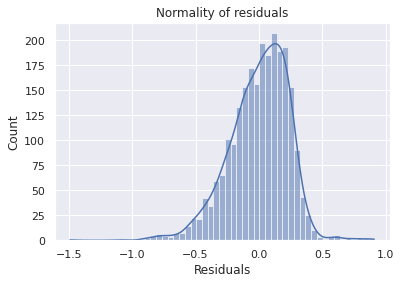

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

A little skewed, but all in all, pretty normal. 

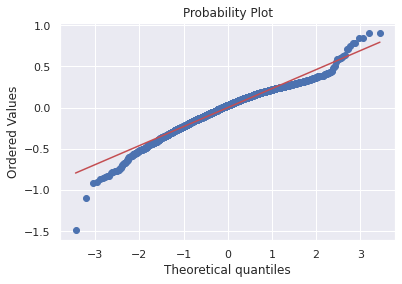

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Not perfect, but pretty close. 

In [ ]:
#testing
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.970625638961792, pvalue=7.520647975304526e-22)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.

The residuals are not normal, yet the residuals are very close to normal and it's not a perfect world.

As such, these residuals can be accepted as distribution is very close to being normal.


*In a nutshell, the assumption is satisfied. Close enough.*

**Test for Homoscedasticity** 

If p-value > 0.05 we can say that the residuals are homoscedastic. 

Otherwise, they are heteroscedastic.

Null hypothesis: Residuals are homoscedastic

Alternate hypothesis: Residuals have heteroscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0064444937578416), ('p-value', 0.4558476973598104)]

P-value is high, null hypothesis must fly--residuals are homoscedastic. 

1. What does the distribution of normalized used device prices look like?

Normal more or less.

## Final Model

**Predictions on test data**

In [ ]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.396852
2341,3.696103,3.983638
1913,3.592093,3.609233
688,4.306495,4.078466
650,4.522115,5.110239
2291,4.259294,4.370564
40,4.997685,5.468065
1884,3.875359,4.017058
2538,4.206631,4.039892
45,5.380450,5.301533


Pretty close predictions to actual 

**Final Model Summary**

In [ ]:
#recreating the final model and printing summary to gain insights.
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
#recreating the final model and printing summary to gain insights.
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     837.2
Date:                   Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                           01:16:05   Log-Likelihood:                 82.585
No. Observations:                   2417   AIC:                            -133.2
Df Residuals:                       2401   BIC:                            -40.53
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233843,0.182808,0.839498,0.838428,4.392176


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241224,0.185969,0.838669,0.836138,4.541137


## Actionable Insights and Recommendations 

**Model Insights**

*It is worth noting that correlation is not causation and some of this analysis was to build a predictive model; it is not perfect, but it's pretty good.

The model is able to explain ~84% of the variation in the data and within 4.5% of the normalized used price on the test data, which is good
This indicates that the model is good for prediction as well as inference purposes (anything greater than 70% is a great model performance).

* If the main_camera_mp of the used devices increases by one unit, then the normalized_used_price increases by 0.0205 units, all other variables held constant.

* If the selfie_camera_mp of the used devices increases by one unit, then the normalized_used_price increases by 0.0137 units, all other variables held constant.

* If the ram of the used devices increases by one unit, then the normalized_used_price increases by 0.0195  units, all other variables held constant.

* If the weight of the used devices increases by one unit, then the normalized_used_price increases by 0.0017, all other variables held constant. 

* If the normalized_new_price increases by one unit, then the normalized_used_price increases by 0.4375 , all other variables held constant. (This makes sense as tech may be getting better throughout the years and the more expensive/newer the tech is initially, it provides a waterfall effect on the "younger" refurbished/used devices.)

* If the years_since_release of the used devices increases by one unit, then the normalized_used_price decreases by 0.0303, all other variables held constant. (Which makes sense as the devices are older, their normalized used price goes down). 

**Additional Insights**

93.1% of the used device market in this dataset are dominated by Android (as such it would be a good idea for ReCell to focus its efforts on Android devices primarily).  

RAM insights: RAM appears to vary greatly with lots of outliers. Honor, Infinix, Nokia, OnePlus, Oppo, Realme, Celkon, and Google have readable distributions, but this is not all inclusive of all brands. 
* 4 GBs of RAM appears to be the overwhelmingly most frequent RAM feature of the devices, but in general the higher the RAM, there greater the normalized used price (again this is correlation not causation, although it does make sense).  

Weight insights: Weight of devices with large batteries tends to vary among brands with some outliers.
* The average weight is around 160 grams. 
* In general, as the weight increases, the normalized used price appears to increase although it is slight. 

Screen insights: In general, larger screens are correlated with higher normalized used prices. 
* There are 1099 phones and tablets across different brands with a screen size larger than 6 inches.

Camera insights:
* The higher the MP for both selfie and rear camera, there is a positive correlation with the the normalized used price. 
* There are 655 devices with selfie cameras with more than 8MP.
* Most of these 655 devices are with Huawei (87), Vivo (78), and Oppo(75). Acer has the least at (1). 

Battery insights: 
* The higher the battery, there is a positive correlation with the normalized used price. 
* 341 used devices are available among the companies with large batteries (over 4500 mAh) 

In general, attributes that are highly correlated with the normalized price of a used device: 
* There are appears to be a negative correlation with both year released and days used. As these times increase, the normalized used price decreases.

* There appears to be a positive correlation with screen size and the normalized used price. As screen size increases, so does price.

It appears 5G has higher normalized used prices than 4G (which makes sense).

**More Recommendations** 

ReCell can gather data about their buyers like age, gender, geographical location, occupation, etc. to better understand the kind of used devices they want to buy based on certain criteria (selfie camera, screen size, etc.). This step may provide better targeted marketing. 

Focusing on "newer/younger" used devices, even though they make up only around 8% of the used devices provided in this data prior to imputing missing values, may lead to better sales as it is predicted/seen that they are correlated with higher prices. However, it could also be worth investigating devices released in 2014 since there are more of them at around 18% of this data (prior to imputing missing values). 

It appears 5G has higher normalized used prices than 4G (which makes sense as they tend to be newer tech)--marketing efforts could focus more on 5G devices. 

ReCell could explore where buyers want to purchase used devices to maximize partnerships and profits. 

ReCell could focus on targeting devices with higher RAM GBs or RAM with 4GB since they are the most common.  

Moreover, seperating the devices based on mobile and tablet could further provide insights into which used devices are more sought after. 


___